In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1
# a

In [392]:
com = pd.read_csv('communities.csv', na_values=["?"])
com = com.drop(['state', 'communityname'], axis=1)

In [393]:
#Check whether there are missing values
com.isnull().any().any()

True

In [394]:
#Find the column that has missing values
com.columns[com.isnull().any()].tolist()

['OtherPerCap']

In [366]:
com[com.OtherPerCap.isnull()].head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,0.27,0.58,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [395]:
#filling missing value
OtherPerCap_mean = com.OtherPerCap.mean()
com.OtherPerCap.fillna(OtherPerCap_mean, axis=0, inplace=True)

In [368]:
com.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [396]:
com_target = com.ViolentCrimesPerPop
com = com.drop(['ViolentCrimesPerPop'], axis=1)

In [385]:
com_feature = com.columns

# b

In [397]:
com = np.array(com)
com = np.array([np.concatenate((v,[1])) for v in com])
com_target = np.array(com_target)

In [398]:
# Using the regression implementation from Machine Learning in Action, Chapter 8:

def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [408]:
com_target

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [412]:
w = standRegres(com,com_target)

In [418]:
#Compute the predictions:
xMat=np.mat(com)
yMat=np.mat(com_target)
yHat = xMat*w
yHat

matrix([[ 0.16551838],
        [ 0.29062973],
        [ 0.38367799],
        ..., 
        [ 0.40142767],
        [ 0.16882645],
        [ 0.37326947]])

In [420]:
yHat = yHat.tolist()
yHat = sum(yHat, [])
yHat = np.array(yHat)

array([ 0.16551838,  0.29062973,  0.38367799, ...,  0.40142767,
        0.16882645,  0.37326947])

In [423]:
# Compute RMSE on training data

# Now we can constuct a vector of errors
err = abs(yHat-com_target)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print(rmse_train)

0.128889607798


In [417]:
yHat

array([ 0.16551838,  0.29062973,  0.38367799, ...,  0.40142767,
        0.16882645,  0.37326947])

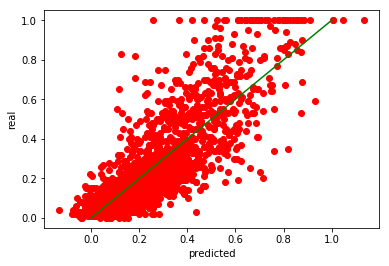

In [424]:
# Plot correlation between predict and real
plt.plot(yHat, com_target,'ro')
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [404]:
#Display the regression coefficients
np.set_printoptions(suppress=True)
print('Regression Coefficients: \n', w)

Regression Coefficients: 
 [[ 0.13110807]
 [-0.0314115 ]
 [ 0.20990967]
 [-0.04053516]
 [-0.01388929]
 [ 0.05897268]
 [ 0.12339902]
 [-0.2226216 ]
 [-0.1475002 ]
 [ 0.05016355]
 [-0.24241383]
 [ 0.04640244]
 [-0.19694562]
 [-0.2061175 ]
 [ 0.04659355]
 [-0.17721291]
 [ 0.06301485]
 [ 0.01149422]
 [-0.09089518]
 [ 0.27464004]
 [ 0.10175248]
 [-0.33151756]
 [-0.02917993]
 [-0.03544834]
 [ 0.02261739]
 [ 0.04309501]
 [ 0.03444085]
 [ 0.12841246]
 [-0.19129336]
 [-0.100769  ]
 [ 0.06468561]
 [ 0.10606212]
 [ 0.00000244]
 [ 0.23498461]
 [-0.03757053]
 [-0.00774958]
 [ 0.46677962]
 [ 0.22629591]
 [ 0.17462195]
 [-0.57520623]
 [-0.14195421]
 [ 0.05687825]
 [-0.35106674]
 [-0.03494934]
 [ 0.00046371]
 [ 0.05570167]
 [-0.18223836]
 [-0.15464644]
 [ 0.1261729 ]
 [-0.14432057]
 [ 0.02390717]
 [ 0.03333902]
 [-0.07422974]
 [ 0.03598764]
 [-0.03316915]
 [-0.21817492]
 [ 0.44577739]
 [-0.20003098]
 [-0.02673077]
 [-0.14145725]
 [ 0.06381331]
 [-0.21011581]
 [ 0.65127647]
 [-0.08027749]
 [-0.25381706

In [409]:
#Compute RMSE using 10-fold x-validation


n = 10
kf = KFold(len(com), n_folds=n)
xval_err = 0
for train,test in kf:
    w = standRegres(com[train],com_target[train])
    yHat = com[test]*w
    yHat = np.array(yHat)
    yHat = yHat.tolist()
    yHat = sum(yHat, [])
    yHat = np.array(yHat)
    e = yHat-com_target[test]
    xval_err += np.sqrt(np.dot(e,e)/len(com[test]))
       
rmse_10cv = xval_err/n

In [425]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1359


# c

In [446]:
from sklearn import feature_selection
from sklearn import cross_validation
linreg = LinearRegression()

percentiles = range(5, 101, 5)
results = []
for i in range(5, 101, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    com_fs = fs.fit_transform(com, com_target)
    scores = abs(cross_validation.cross_val_score(linreg, com_fs, com_target, cv=5, scoring='neg_mean_absolute_error'))
    print(i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = int(np.where(results == results.min())[0])
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
optimal_num_features = int(percentiles[optimal_percentile]*len(com_feature)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/skle

5 0.101090355098
10 0.101223173261
15 0.101206613263
20 0.099454567158
25 0.0974394270804
30 0.0964616005049
35 0.0961899367069
40 0.0959614981461
45 0.0963959244422
50 0.0965548557696
55 0.0968677787581
60 0.0975567036143
65 0.0977916033056
70 0.0980011648836
75 0.0980131880248
80 0.0976755285205
85 0.0971218961593
90 0.097455027258
95 0.0968669574455
100 0.0968752032537
Optimal percentile of features:40 

Optimal number of features:38 



/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/skle

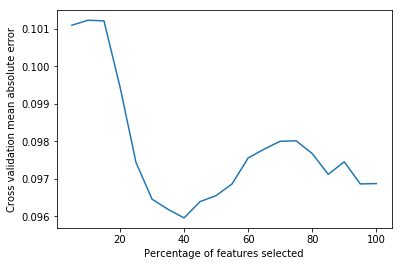

In [447]:
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation mean absolute error")
pl.plot(percentiles,results)

In [434]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=40)
X_train_fs = fs.fit_transform(com, com_target)
for i in range(len(com_feature)):
    if fs.get_support()[i]:
        print(com_feature[i],'\t', fs.scores_[i] )

population 	 310.369918779
racepctblack 	 1319.68643314
racePctWhite 	 1758.77227347
numbUrban 	 302.12358082
medIncome 	 437.1590743
pctWInvInc 	 990.700974651
pctWPubAsst 	 982.200467892
medFamInc 	 475.837601763
perCapInc 	 281.878264885
NumUnderPov 	 499.025448645
PctPopUnderPov 	 745.599159432
PctLess9thGrade 	 405.110531951
PctNotHSGrad 	 607.30932519
PctBSorMore 	 218.927028337
PctUnemployed 	 679.145660493
PctEmploy 	 246.16946805
MalePctDivorce 	 759.581937457
FemalePctDiv 	 891.494024673
TotalPctDiv 	 876.510085951
PctFam2Par 	 1987.05731023
PctKids2Par 	 2388.61868809
PctYoungKids2Par 	 1588.37986036
PctTeen2Par 	 1550.53163637
NumIlleg 	 567.975360335
PctIlleg 	 2381.98320035
PctLargHouseFam 	 343.442480514
PctPersOwnOccup 	 759.916937383
PctPersDenseHous 	 514.036224481
PctHousLess3BR 	 578.789197875
MedNumBR 	 291.680471184
HousVacant 	 430.103642138
PctHousOccup 	 225.687787259
PctHousOwnOcc 	 566.905240411
PctVacantBoarded 	 605.507916549
PctHousNoPhone 	 623.483263567


/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yanyu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# d

In [435]:
#splitting
from sklearn.cross_validation import train_test_split
train, test, target_train, target_test = train_test_split(com, com_target, test_size=0.2, random_state=33)

In [436]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridgeclf = Ridge(fit_intercept=True)

In [437]:
def calc_params(X, y, clf, param_values, param_name, K):
    print('Ridge Regression')
    print('alpha\t RMSE_train\t RMSE_cv\n')

    t_rmse = np.array([])
    cv_rmse = np.array([])

    for param_value in param_values:
        clf.set_params(**{param_name:param_value})
    
    # computing the RMSE on training data
        clf.fit(X,y)
        p = clf.predict(X)
        err = p-y
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
        kf = KFold(len(X), n_folds=K)
        xval_err = 0
        for train, test in kf:
            clf.fit(X[train], y[train])
            p = clf.predict(X[test])
            err = p - y[test]
            xval_err += np.sqrt(np.dot(err,err)/len(X[test]))
        rmse_cv = xval_err/K
    
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(param_value,rmse_train,rmse_cv))
        
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

In [438]:
alpha_values = np.linspace(.01,20,50)

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 0.1262		 0.1341
0.418	 0.1268		 0.1333
0.826	 0.1273		 0.1332
1.234	 0.1276		 0.1332
1.642	 0.1279		 0.1333
2.050	 0.1281		 0.1333
2.458	 0.1284		 0.1334
2.866	 0.1286		 0.1334
3.274	 0.1288		 0.1335
3.682	 0.1289		 0.1335
4.090	 0.1291		 0.1336
4.498	 0.1292		 0.1337
4.906	 0.1294		 0.1337
5.313	 0.1295		 0.1338
5.721	 0.1296		 0.1338
6.129	 0.1297		 0.1339
6.537	 0.1298		 0.1339
6.945	 0.1299		 0.1340
7.353	 0.1300		 0.1340
7.761	 0.1301		 0.1341
8.169	 0.1302		 0.1341
8.577	 0.1303		 0.1341
8.985	 0.1304		 0.1342
9.393	 0.1305		 0.1342
9.801	 0.1306		 0.1343
10.209	 0.1306		 0.1343
10.617	 0.1307		 0.1343
11.025	 0.1308		 0.1344
11.433	 0.1308		 0.1344
11.841	 0.1309		 0.1344
12.249	 0.1310		 0.1345
12.657	 0.1310		 0.1345
13.065	 0.1311		 0.1345
13.473	 0.1312		 0.1346
13.881	 0.1312		 0.1346
14.289	 0.1313		 0.1346
14.697	 0.1313		 0.1347
15.104	 0.1314		 0.1347
15.512	 0.1314		 0.1347
15.920	 0.1315		 0.1348
16.328	 0.1315		 0.1

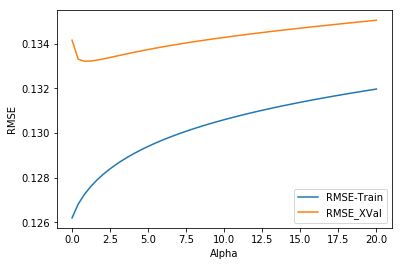

In [439]:
calc_params(train, target_train, ridgeclf, alpha_values, 'alpha', 5)

In [440]:
from sklearn.linear_model import Lasso
lassoclf = Lasso(fit_intercept=True)

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 0.1520		 0.1521
0.418	 0.2312		 0.2310
0.826	 0.2312		 0.2310
1.234	 0.2312		 0.2310
1.642	 0.2312		 0.2310
2.050	 0.2312		 0.2310
2.458	 0.2312		 0.2310
2.866	 0.2312		 0.2310
3.274	 0.2312		 0.2310
3.682	 0.2312		 0.2310
4.090	 0.2312		 0.2310
4.498	 0.2312		 0.2310
4.906	 0.2312		 0.2310
5.313	 0.2312		 0.2310
5.721	 0.2312		 0.2310
6.129	 0.2312		 0.2310
6.537	 0.2312		 0.2310
6.945	 0.2312		 0.2310
7.353	 0.2312		 0.2310
7.761	 0.2312		 0.2310
8.169	 0.2312		 0.2310
8.577	 0.2312		 0.2310
8.985	 0.2312		 0.2310
9.393	 0.2312		 0.2310
9.801	 0.2312		 0.2310
10.209	 0.2312		 0.2310
10.617	 0.2312		 0.2310
11.025	 0.2312		 0.2310
11.433	 0.2312		 0.2310
11.841	 0.2312		 0.2310
12.249	 0.2312		 0.2310
12.657	 0.2312		 0.2310
13.065	 0.2312		 0.2310
13.473	 0.2312		 0.2310
13.881	 0.2312		 0.2310
14.289	 0.2312		 0.2310
14.697	 0.2312		 0.2310
15.104	 0.2312		 0.2310
15.512	 0.2312		 0.2310
15.920	 0.2312		 0.2310
16.328	 0.2312		 0.2

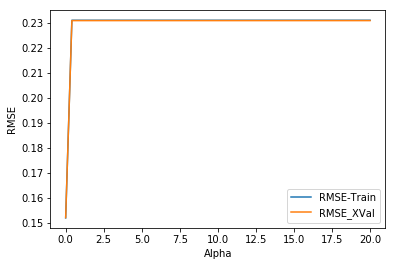

In [441]:
calc_params(train, target_train, lassoclf, alpha_values, 'alpha', 5)

# Ridge regression with alpha 0.418 perform best
# Lasso regression with alpha 0.01 perform best

In [442]:
# Test the model on test dataset
#ridge
ridgeclf = Ridge(fit_intercept=True, alpha=0.418)
ridgeclf.fit(train,target_train)
p = ridgeclf.predict(test)
err = p-target_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print('ridge:', rmse_test)

ridge: 0.143161012674


In [443]:
#lasso
lassoclf = Lasso(fit_intercept=True, alpha=0.01)
lassoclf.fit(train,target_train)
p = lassoclf.predict(test)
err = p-target_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print('lasso:', rmse_test)

lasso: 0.164257160163


# Ridge model is better than lasso model. In ridge model, the train-RMSE firstly decreases then increases with the increase of alpha. cross validataion-RMSE always increases. When I test the best model on testing dataset, the RMSE is slight higher than training's. Thus, there is no overfitting problem.

# e

In [444]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train_norm = scaler.transform(train)
test_norm = scaler.transform(test)

In [472]:
#Using GridSearch
from sklearn.grid_search import GridSearchCV
sgdreg = SGDRegressor()
parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 10, 50)
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [475]:
%time _ = gs.fit(train_norm, target_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 2.46 s, sys: 78.3 ms, total: 2.54 s
Wall time: 2.55 s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.5s finished


({'alpha': 0.20417959183673468, 'penalty': 'l2'}, 0.6436535741705254)

In [476]:
sgdreg = SGDRegressor(alpha = 0.204, penalty = 'l2')

sgdreg.fit(train_norm, target_train)
print('Accuracy:', sgdreg.score(test_norm, target_test))

Accuracy: 0.632439467334


/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [329]:
#Using calc_params
from sklearn.cross_validation import KFold

def calc_params_accu(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    #X = np.array(X)
    #y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [330]:
md_ratio = np.linspace(0, 1, 20)

/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


l1_ratio  =  0.0
l1_ratio  =  0.0526315789474
l1_ratio  =  0.105263157895
l1_ratio  =  0.157894736842
l1_ratio  =  0.210526315789
l1_ratio  =  0.263157894737
l1_ratio  =  0.315789473684
l1_ratio  =  0.368421052632
l1_ratio  =  0.421052631579
l1_ratio  =  0.473684210526
l1_ratio  =  0.526315789474
l1_ratio  =  0.578947368421
l1_ratio  =  0.631578947368
l1_ratio  =  0.684210526316
l1_ratio  =  0.736842105263
l1_ratio  =  0.789473684211
l1_ratio  =  0.842105263158
l1_ratio  =  0.894736842105
l1_ratio  =  0.947368421053
l1_ratio  =  1.0


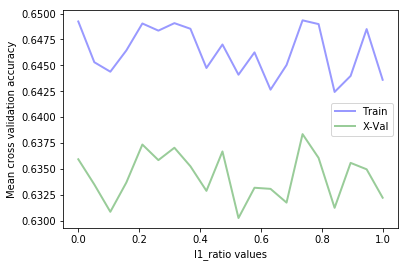

In [332]:
sgdreg = SGDRegressor()
train_scores, test_scores = calc_params_accu(train, target_train, sgdreg , md_ratio, 'l1_ratio', 5)

# If I use Grid Search, the best combination of parameters is alpha = 0.0001, penalty = l2. The accuarcy is 0.63. However, if I use the function I create to choose the best value of l1_ratio, it is hard to tell which one is the best depends on the accuarcy plot. Thus, in this case, Grid Search is the best way to choose parameters.

# 2
# a

In [70]:
def distCosine(vecA, vecB):  
    vecB_norm = np.linalg.norm(vecB)
    vecA_norm = np.linalg.norm(vecA)
    sims = np.dot(vecB,vecA)/(vecB_norm * vecA_norm)
    dists = 1 - sims
    return dists

# b

In [71]:
column_names = pd.read_csv('terms.txt', header=None)
column_names = np.array(column_names)
column_names = column_names.tolist()
column_names = sum(column_names, [])

x = pd.read_csv('matrix.txt', delimiter=",", header=None)
x = x.T
x.columns = column_names

y = pd.read_csv('classes.txt', delimiter=" ", header= None, skiprows = 1, index_col=0)

In [72]:
from sklearn.cross_validation import train_test_split
train, test, target_train, target_test = train_test_split(x, y, test_size=0.2, random_state=33)

# c

In [73]:
import kMeans

In [74]:
train_array = np.array(train)

In [75]:
centroids, clusters = kMeans.kMeans(train_array, 5, kMeans.distCosine, kMeans.randCent)

In [76]:
np.set_printoptions(suppress=True)
print(centroids)

[[ 0.00416667  0.          0.00833333 ...,  0.          0.          0.        ]
 [ 0.00568182  0.          0.00852273 ...,  0.          0.          0.        ]
 [ 0.00086505  0.00346021  0.05709343 ...,  0.          0.          0.        ]
 [ 0.33333333  0.          0.         ...,  0.33333333  0.16666667  1.        ]
 [ 0.          0.          0.         ...,  0.16666667  0.          0.        ]]


In [77]:
pd.options.mode.chained_assignment = None
train['cluster'] = clusters.T[0].tolist()

In [78]:
def clusterInfor(x, k):
    for i in range(k):
        df = x.loc[x['cluster'] == i]
        df2 = df.drop(['cluster'], axis=1)
        DF = []
        for col in df2.columns:
            n = 0
            for j in df2[col]:
                if j != 0:
                    n += 1
            DF.append(n)
            
        print("\n", 'Number of documents in cluster', i, ': ', df2.shape[0], '\n')
        if df2.shape[0] == 0:
            continue
        else:
            DF = np.array(DF)
            idx = np.argsort(-DF)
            print("\tWord\t\tDF\t\tPercentofDocs")
            for z in idx[:10]:
                print("%10s\t\t%.0f\t\t%.4f" % (column_names[z], DF[z], DF[z]/df2.shape[0]*100))

In [79]:
clusterInfor(train, 5)


 Number of documents in cluster 0 :  480 

	Word		DF		PercentofDocs
subdirectori		480		100.0000
    salari		226		47.0833
      emac		173		36.0417
     plead		151		31.4583
        th		120		25.0000
    offens		105		21.8750
    inclin		100		20.8333
 shintoism		99		20.6250
intercours		94		19.5833
       ask		91		18.9583

 Number of documents in cluster 1 :  352 

	Word		DF		PercentofDocs
subdirectori		352		100.0000
      wind		275		78.1250
     wrist		163		46.3068
       fil		150		42.6136
        dn		127		36.0795
    rumour		125		35.5114
        th		118		33.5227
   gestapo		116		32.9545
     knock		113		32.1023
   omnipag		112		31.8182

 Number of documents in cluster 2 :  1156 

	Word		DF		PercentofDocs
subdirectori		1156		100.0000
     wrist		752		65.0519
    articl		579		50.0865
   omnipag		570		49.3080
     thing		419		36.2457
 jurisdict		408		35.2941
     knock		401		34.6886
   gestapo		387		33.4775
       gnu		371		32.0934
 pentecost		368		31.8339

 Number of documents in cluster 3 

# Extra Credit

In [86]:
#Cluster 0
df = train.loc[train['cluster'] == 0]
df2 = df.drop(['cluster'], axis=1)
DF = []
for col in df2.columns:
    n = 0
    for j in df2[col]:
        if j != 0:
            n += 1
    DF.append(n)
    
wc = []
for a,b in zip(DF, column_names):
    wc.append(a*[b])
wc = sum(wc, [])

fo = open("cluster0.txt", "w")
str1 = ', '.join(wc)
fo.write( str1 )
fo.close()

(-0.5, 399.5, 199.5, -0.5)

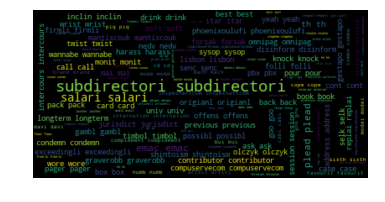

In [107]:
from wordcloud import WordCloud
text = open('cluster0.txt').read()
text
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [108]:
#Cluster 1
df = train.loc[train['cluster'] == 1]
df2 = df.drop(['cluster'], axis=1)
DF = []
for col in df2.columns:
    n = 0
    for j in df2[col]:
        if j != 0:
            n += 1
    DF.append(n)
    
wc = []
for a,b in zip(DF, column_names):
    wc.append(a*[b])
wc = sum(wc, [])

fo = open("cluster1.txt", "w")
str1 = ', '.join(wc)
fo.write( str1 )
fo.close()

(-0.5, 399.5, 199.5, -0.5)

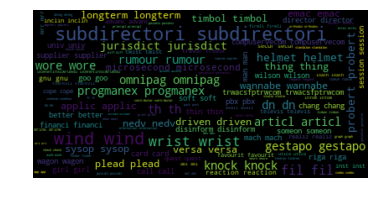

In [109]:
from wordcloud import WordCloud
text = open('cluster1.txt').read()
text
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [112]:
#Cluster 2
df = train.loc[train['cluster'] == 2]
df2 = df.drop(['cluster'], axis=1)
DF = []
for col in df2.columns:
    n = 0
    for j in df2[col]:
        if j != 0:
            n += 1
    DF.append(n)
    
wc = []
for a,b in zip(DF, column_names):
    wc.append(a*[b])
wc = sum(wc, [])

fo = open("cluster2.txt", "w")
str1 = ', '.join(wc)
fo.write( str1 )
fo.close()

(-0.5, 399.5, 199.5, -0.5)

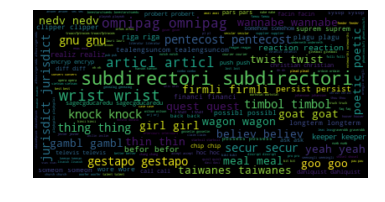

In [113]:
from wordcloud import WordCloud
text = open('cluster2.txt').read()
text
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [114]:
#Cluster 3
df = train.loc[train['cluster'] == 3]
df2 = df.drop(['cluster'], axis=1)
DF = []
for col in df2.columns:
    n = 0
    for j in df2[col]:
        if j != 0:
            n += 1
    DF.append(n)
    
wc = []
for a,b in zip(DF, column_names):
    wc.append(a*[b])
wc = sum(wc, [])

fo = open("cluster3.txt", "w")
str1 = ', '.join(wc)
fo.write( str1 )
fo.close()

(-0.5, 399.5, 199.5, -0.5)

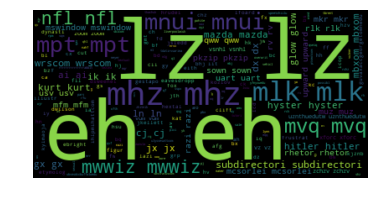

In [115]:
from wordcloud import WordCloud
text = open('cluster3.txt').read()
text
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [116]:
#Cluster 4
df = train.loc[train['cluster'] == 4]
df2 = df.drop(['cluster'], axis=1)
DF = []
for col in df2.columns:
    n = 0
    for j in df2[col]:
        if j != 0:
            n += 1
    DF.append(n)
    
wc = []
for a,b in zip(DF, column_names):
    wc.append(a*[b])
wc = sum(wc, [])

fo = open("cluster4.txt", "w")
str1 = ', '.join(wc)
fo.write( str1 )
fo.close()

(-0.5, 399.5, 199.5, -0.5)

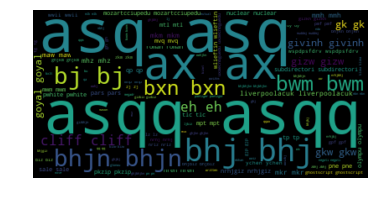

In [117]:
from wordcloud import WordCloud
text = open('cluster4.txt').read()
text
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# d

In [80]:
from sklearn.metrics import completeness_score, homogeneity_score
c = clusters.T[0]
c = c.astype(int)
target_train = np.array(target_train)
target_train = target_train.tolist()
target_train = sum(target_train, [])

print(completeness_score(target_train,c))
print(homogeneity_score(target_train,c))

0.641019156867
0.398323263391


# e

In [81]:
inx = test.index.tolist()

In [82]:
test = np.array(test)
for item, index in zip(test, inx):
    dist = distCosine(item, centroids[0])
    n = 0
    cluster = 0
    for centroid in centroids[1:]:
        distance = distCosine(item, centroid)
        n += 1
        if dist < distance:
            continue
        else:
            dist = distance
            cluster = n
            
    print('Cosine similarity between Document %d and the query is: %.4f' % (index, dist))
    print('Document %d belongs to %d' % (index, cluster), '\n')

Cosine similarity between Document 1590 and the query is: 0.8000
Document 1590 belongs to 2 

Cosine similarity between Document 277 and the query is: 0.8005
Document 277 belongs to 2 

Cosine similarity between Document 2297 and the query is: 0.7867
Document 2297 belongs to 0 

Cosine similarity between Document 1739 and the query is: 0.5700
Document 1739 belongs to 1 

Cosine similarity between Document 511 and the query is: 0.7074
Document 511 belongs to 0 

Cosine similarity between Document 96 and the query is: 0.6140
Document 96 belongs to 2 

Cosine similarity between Document 2259 and the query is: 0.6326
Document 2259 belongs to 2 

Cosine similarity between Document 1850 and the query is: 0.8038
Document 1850 belongs to 0 

Cosine similarity between Document 1615 and the query is: 0.5930
Document 1615 belongs to 2 

Cosine similarity between Document 1467 and the query is: 0.8409
Document 1467 belongs to 2 

Cosine similarity between Document 257 and the query is: 0.8103
Docu

Cosine similarity between Document 957 and the query is: 0.6860
Document 957 belongs to 2 

Cosine similarity between Document 2417 and the query is: 0.6772
Document 2417 belongs to 2 

Cosine similarity between Document 1884 and the query is: 0.7164
Document 1884 belongs to 1 

Cosine similarity between Document 1849 and the query is: 0.7131
Document 1849 belongs to 2 

Cosine similarity between Document 1444 and the query is: 0.6300
Document 1444 belongs to 1 

Cosine similarity between Document 2351 and the query is: 0.7537
Document 2351 belongs to 2 

Cosine similarity between Document 1037 and the query is: 0.7895
Document 1037 belongs to 2 

Cosine similarity between Document 167 and the query is: 0.7526
Document 167 belongs to 0 

Cosine similarity between Document 1264 and the query is: 0.8283
Document 1264 belongs to 0 

Cosine similarity between Document 1690 and the query is: 0.9482
Document 1690 belongs to 2 

Cosine similarity between Document 1208 and the query is: 0.7712